# Project Abstract:
    
This dataset contains information on default payments, demographic factors, credit data, history of payment,
and bill statements of credit card clients 

![title](img.jpg)

Content
- 1)Data Cleaning
- 1.1) Finding Out missing values
- 1.1) Finding out Outliers 
- 2) Data Exploration
- 3) Feature Engineering
- 3.1) One hot encoding
- 4) Feature Selection
- 5) Algorithm 
- 5.1) Logistic Regression
- Imbalanced data in dataset so perdorming undersampling,oversampling and smote
- 5.2) Random Forest hyper parameter tuning 

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [3]:
data=pd.read_excel('default of credit card clients.xls')
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# 1) Data Cleaning


# 1.1)  Finding Out missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##### Changing Column names

In [6]:
data=data.rename(columns={"default payment next month": "default_payment_next_month",'PAY_0':'PAY_1'})

##### Checking out Nan Values

In [7]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

- There is no null values present

## 1.2) Cleaning Undocumented labels


##### Checking out in column values present in PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6

In [8]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

- From all pay values there is -1,-2,0 all are duly paid and rest are delay in payment so changing values of -1,-2 to 0 values

In [9]:
fil = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[fil, 'PAY_1'] = 0
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_5'] = 0
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0

#### Education could be only of four category but in this it is more than four category so changing it

In [10]:
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### In mariages the category could be only single,married and others so one of parameter is more so changing it

In [11]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [13]:
data['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

# 2) Data Exploartion or Visulisation 

#### Bar Plot of Education

In [14]:
EDUCATION= data['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})

In [15]:
EDUCATION['index'][0] = 'PG'
EDUCATION['index'][1] = 'UG'
EDUCATION['index'][2] = 'Intermediate'
EDUCATION['index'][3] = 'Unknown 1'



C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [16]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

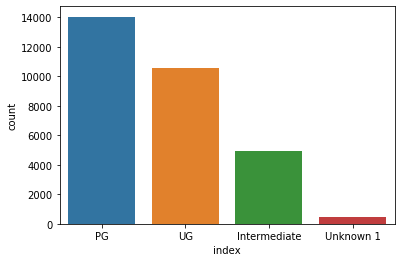

In [17]:
ax=sns.barplot(x = EDUCATION['index'],y = EDUCATION['count'])
plt.show()

In [18]:
fig = go.Figure(go.Bar(
    x = EDUCATION['index'],y = EDUCATION['count'],text = EDUCATION['count'],marker={'color': EDUCATION['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

- Majority of education is pg

#### Total perecentage of default and non default with respect to  education

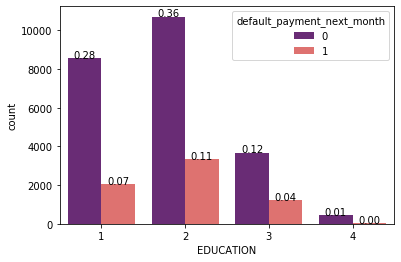

In [19]:
total = float(len(data))
ax=sns.countplot(x='EDUCATION',hue='default_payment_next_month',data=data,palette = 'magma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

- More number of default is 2 education

#### Total perecentage of default and non default with respect to male and female

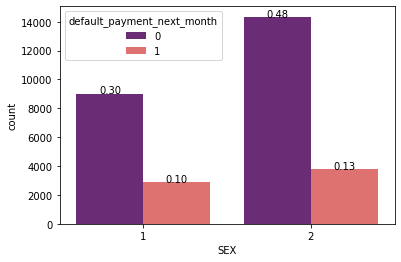

In [20]:
total = float(len(data))
ax=sns.countplot(x='SEX',hue='default_payment_next_month',data=data,palette = 'magma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

- more number of default is 2.

#### Histogram Plot

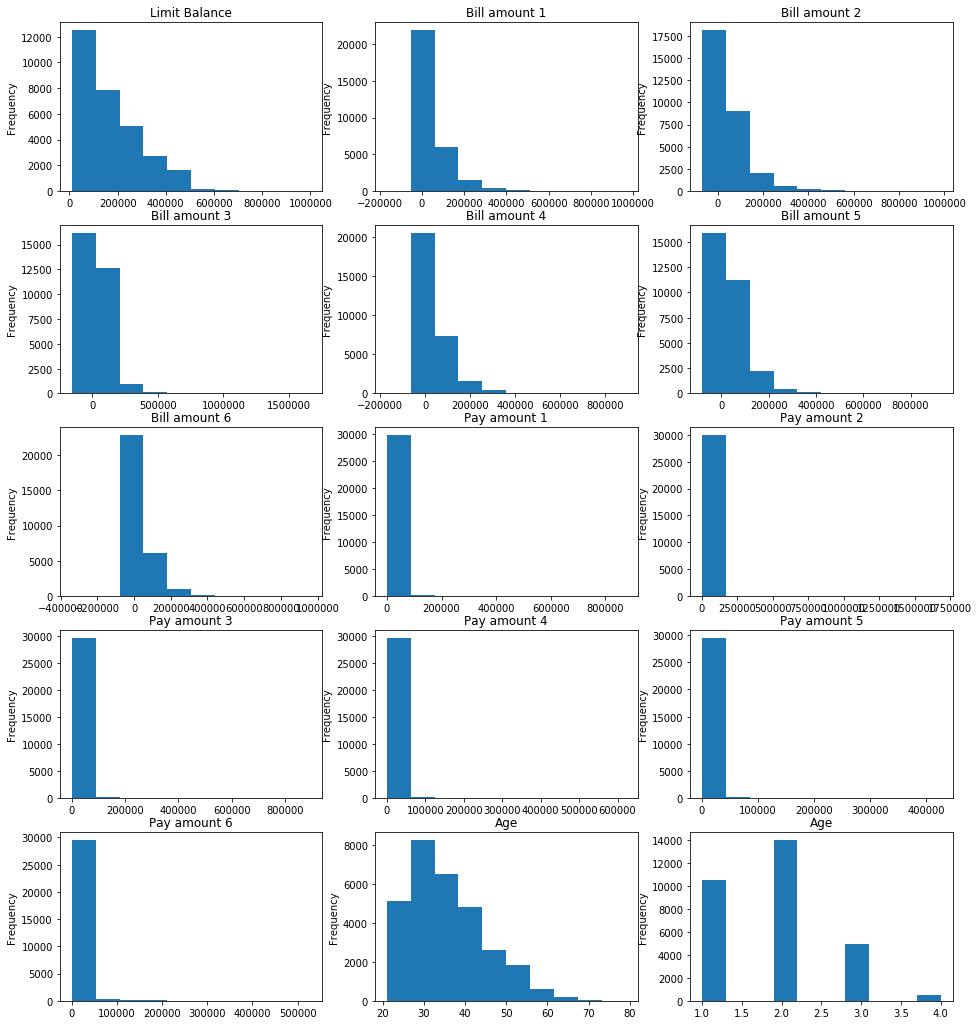

In [21]:
fig, axarr = plt.subplots(5, 3, figsize=(16, 18))
data['LIMIT_BAL'].plot.hist(ax=axarr[0][0],title='Limit Balance')
data['BILL_AMT1'].plot.hist(ax=axarr[0][1], title='Bill amount 1')
data['BILL_AMT2'].plot.hist(ax=axarr[0][2], title='Bill amount 2')
data['BILL_AMT3'].plot.hist(ax=axarr[1][0], title='Bill amount 3')
data['BILL_AMT4'].plot.hist(ax=axarr[1][1], title='Bill amount 4')
data['BILL_AMT5'].plot.hist(ax=axarr[1][2], title='Bill amount 5')
data['BILL_AMT6'].plot.hist(ax=axarr[2][0], title='Bill amount 6')
data['PAY_AMT1'].plot.hist(ax=axarr[2][1], title='Pay amount 1')
data['PAY_AMT2'].plot.hist(ax=axarr[2][2], title='Pay amount 2')
data['PAY_AMT3'].plot.hist(ax=axarr[3][0], title='Pay amount 3')
data['PAY_AMT4'].plot.hist(ax=axarr[3][1], title='Pay amount 4')
data['PAY_AMT5'].plot.hist(ax=axarr[3][2], title='Pay amount 5')
data['PAY_AMT6'].plot.hist(ax=axarr[4][0], title='Pay amount 6')
data['AGE'].plot.hist(ax=axarr[4][1],title='Age')
data['EDUCATION'].plot.hist(ax=axarr[4][2],title='Age')

# 3) Feature Engineering

### 3.1)One - hot encoding

In [22]:
data[['SEX','MARRIAGE','EDUCATION']] = data[['SEX','MARRIAGE','EDUCATION']].astype('object')
data=pd.get_dummies(data,drop_first=True)
data.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,1,1,1,0,0,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,0,2000,1,1,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,1,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,1,1,0,0,0,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,9000,689,679,0,0,1,0,0,0,0


In [23]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [24]:
data = data[['LIMIT_BAL','AGE','SEX_2','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_2','MARRIAGE_3','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
             'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
            'PAY_AMT5','PAY_AMT6','default_payment_next_month']]
data

,LIMIT_BAL,AGE,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,24,1,1,0,0,0,0,2,2,...,0,0,0,0,689,0,0,0,0,1
1,120000,26,1,1,0,0,1,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,1,1,0,0,1,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,1,1,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,0,1,0,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,1,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,43,0,0,1,0,1,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,37,0,1,0,0,1,0,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,41,0,0,1,0,0,0,1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# 4) Feature Selection

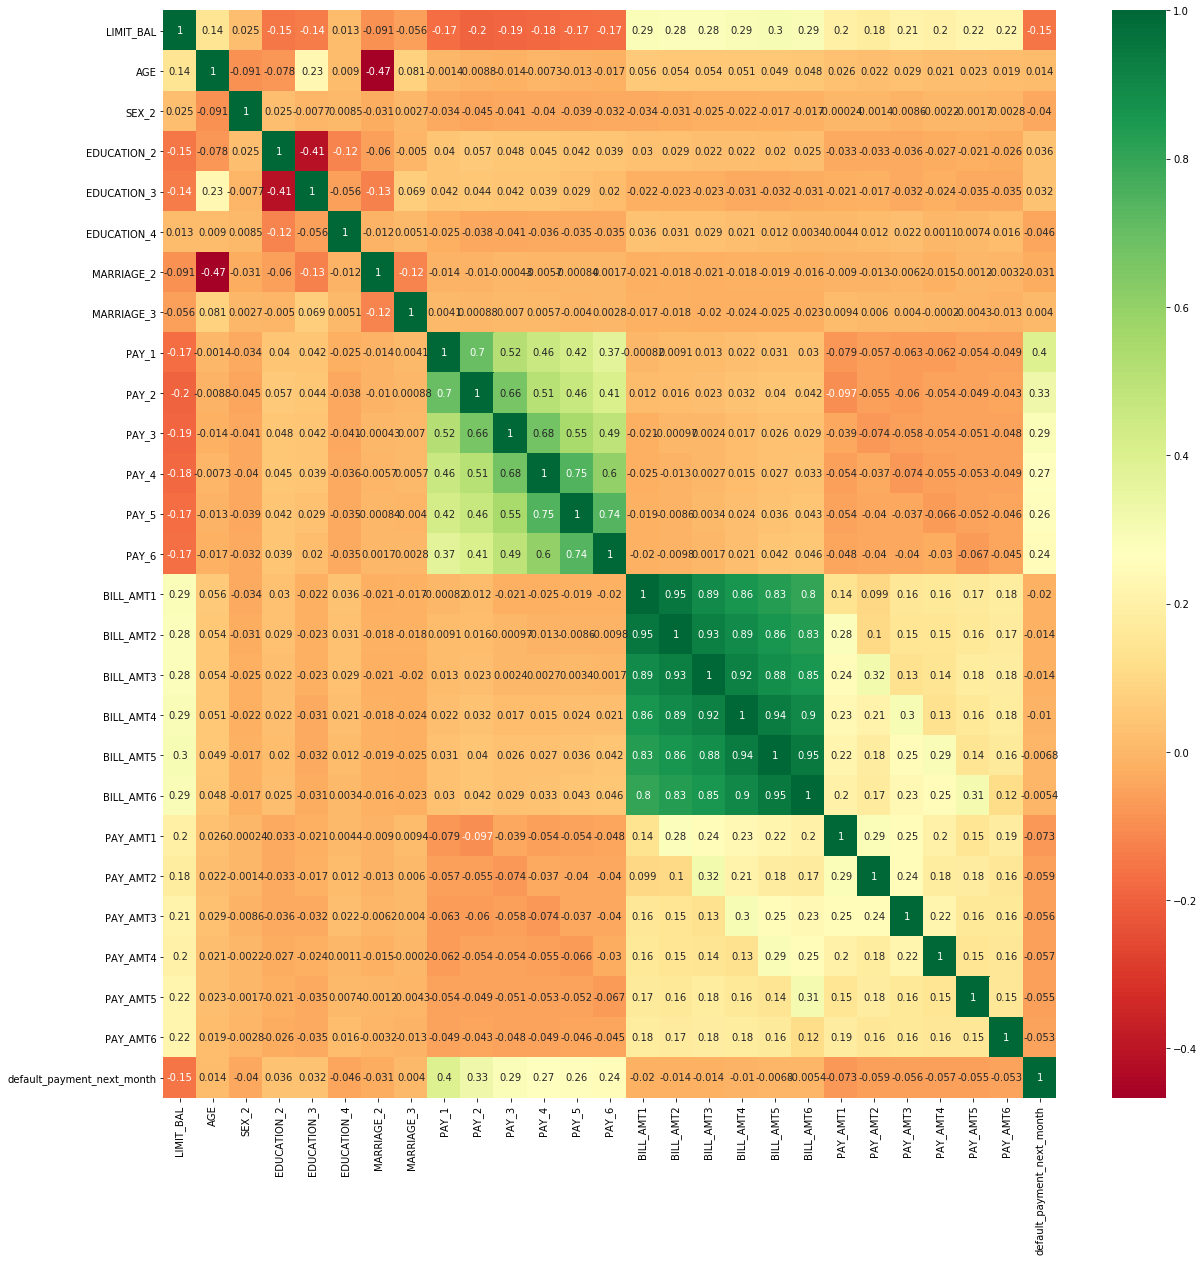

In [25]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Selecting correlation above +0.15 and -0.15 so selecting all columns rest all are dropped

In [26]:
data.drop(['AGE','SEX_2','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_2','MARRIAGE_3','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
            'PAY_AMT5','PAY_AMT6',],axis=1,inplace=True)

In [27]:
data.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default_payment_next_month'],
      dtype='object')

# 5) Algorithm

## 5.1) Baseline model:logistic regression

In [28]:
X=data.iloc[:,0:7]
y=data.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

In [31]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7937777777777778

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      7040
           1       0.54      0.35      0.43      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.65      9000
weighted avg       0.77      0.79      0.78      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


- From above as you can see there is no changes in precision and recall for fraud.So from that we get to know there is 
imbalanced data set so it is handled carefully by doing following steps shown below

In [32]:
X=data.iloc[:,0:7]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [33]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

##### There's a lot of imbalance in the sample. So there are many ways to resampling!
Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems.
The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.
- A) Random Oversampling: Randomly duplicate examples in the minority class.
- B) Random Undersampling: Randomly delete examples in the majority class.
- C) SMOTE: Synthetic Minority Oversampling Technique

In [34]:
# Separate majority and minority classes
df_majority = df_train[df_train.default_payment_next_month == 0]
df_minority = df_train[df_train.default_payment_next_month == 1]

print(df_majority.default_payment_next_month.count())
print("-----------")
print(df_minority.default_payment_next_month.count())
print("-----------")
print(df_train.default_payment_next_month.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: default_payment_next_month, dtype: int64


# A) Random Oversampling:
Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.
Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [35]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 16355,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default_payment_next_month.value_counts()

1    16355
0    16355
Name: default_payment_next_month, dtype: int64

# B) Random Undersampling:
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.
This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit

In [36]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default_payment_next_month.value_counts()

1    4645
0    4645
Name: default_payment_next_month, dtype: int64

# C) SMOTE: Synthetic Minority Oversampling Technique
The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

32710
16355


# Undersampling is chosen

In [38]:
## Get the Fraud and the normal dataset 

fraud = data[data['default_payment_next_month']==1]

normal = data[data['default_payment_next_month']==0]

In [39]:
print(fraud.shape,normal.shape)

(6636, 8) (23364, 8)


In [40]:
from imblearn.under_sampling import NearMiss

In [41]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(sampling_strategy=1)
X_res,y_res=nm.fit_sample(X,y)

In [42]:
X_res.shape,y_res.shape

((13272, 7), (13272,))

In [43]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 6636, 1: 6636})


## 5.2) Random Forest hyper parameter tuning

In [44]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .3,
                                                  random_state=12)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.1min remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [48]:
y_predict=model.predict(X_test)

In [49]:
y_predict

array([0.10659822, 0.57568335, 0.11533954, ..., 0.11550549, 0.16564771,
       0.117217  ])

In [50]:
y_test

8941     0
17618    1
27895    0
16103    0
4422     0
        ..
27933    0
26623    0
21750    0
14888    0
20705    0
Name: default_payment_next_month, Length: 9000, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))

[[6681  328]
 [1248  743]]


In [52]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict.round(),y_test))

0.8248888888888889


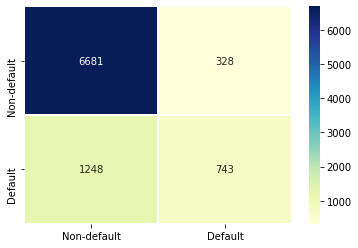

In [53]:
ConfMatrix = confusion_matrix(y_test,y_predict.round())
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5)



In [54]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [55]:
import pickle

In [56]:
pickle.dump(model,open('model.pkl','wb'))

In [57]:
model=pickle.load(open('model.pkl','rb'))

In [58]:
print(model.predict([[2000,1,0,1,2,0,0]]))

[0.34746807]
